In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import * 
from fastai.vision.all import * 

In [2]:
def search_images(term,max_images=300):
    return L(ddg_images(term,max_results=max_images)).itemgot("image")

In [3]:
searches = "Gyomei Himejima","Sanemi Shinazugawa","Kyojuro Rengoku","Giyu Tomioka","Tengen Uzui","Obanai Iguro","Muchiro Tokito","Shinobu Kocho","Mistduri Kanroji"
path = Path("Which_Hashira_Is_That")
from time import sleep

for i in searches:
    destination = path/i
    destination.mkdir(exist_ok=True,parents=True)
    download_images(destination,urls=search_images(f"{i} Photos"))
    resize_images(path/i,max_size=400,dest=path/i)

/home/samarth/anaconda3/lib/python3.10/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/home/samarth/anaconda3/lib/python3.10/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/home/samarth/anaconda3/lib/python3.10/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")
/home/samarth/anaconda3/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/samarth/anaconda3/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/samarth/anaconda3/lib/pyt

In [5]:
failed_images = verify_images(get_image_files(path))
failed_images.map(Path.unlink)
len(failed_images)

25

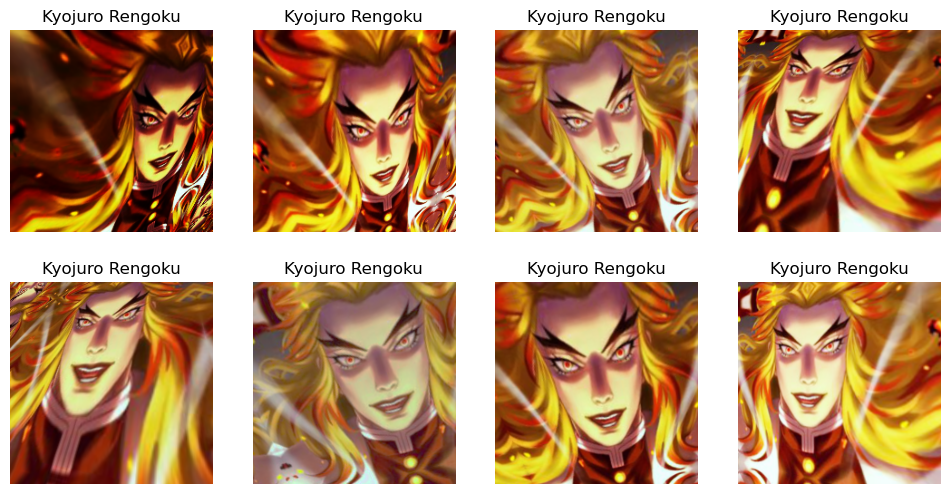

In [27]:
hashiras = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224,min_scale=0.5),
    batch_tfms = aug_transforms(mult=2)
)
dls = hashiras.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [28]:
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

/home/samarth/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/samarth/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,3.344982,1.536628,0.516779,00:16


epoch,train_loss,valid_loss,error_rate,time
0,1.962613,0.967874,0.342282,00:21
1,1.545180,0.641520,0.208054,00:24
2,1.247023,0.561707,0.174497,00:21
3,1.083918,0.546260,0.174497,00:21


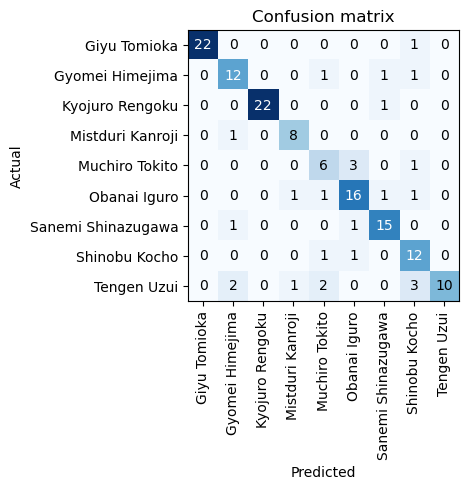

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

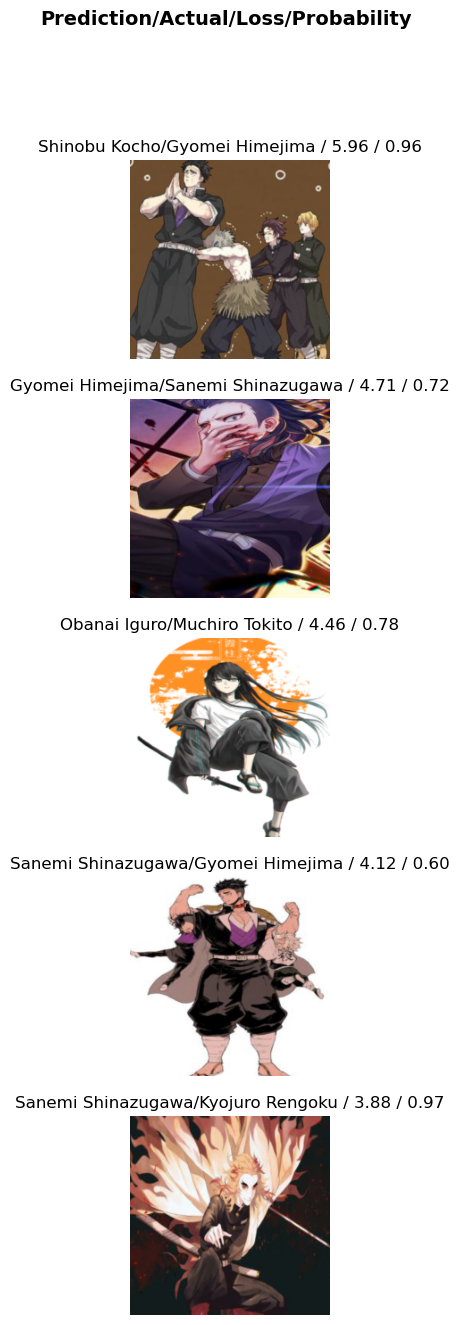

In [32]:
interp.plot_top_losses(5,nrows=5)

In [38]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [40]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)

In [43]:
which_hashira,_,prob = learn.predict(PILImage.create("rengoku.jpeg"))
print(f"This is {which_hashira}")
print(f"Probabiltiy of being {which_hashira} is {prob[2]:.4f}")

This is Kyojuro Rengoku
Probabiltiy of being Kyojuro Rengoku is 0.9996


In [44]:
learn.export()

In [48]:
categories = ("Giyu Tomioka","Gyomei Himejima","Kyojuro Rengoku","Mistduri Kanroji","Muchiro Tokito","Obanai Iguro","Sanemi Shinazugawa","Shinobu Kocho","Tengen Uzui")
def classifiy_images(img):
    pred,idx,probs=learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [49]:
classifiy_images("tokito.jpeg")

{'Giyu Tomioka': 0.0012553463457152247,
 'Gyomei Himejima': 0.0016293821390718222,
 'Kyojuro Rengoku': 0.0001662822614889592,
 'Mistduri Kanroji': 0.00013147889694664627,
 'Muchiro Tokito': 0.9784828424453735,
 'Obanai Iguro': 0.0038823578506708145,
 'Sanemi Shinazugawa': 0.008048096671700478,
 'Shinobu Kocho': 0.006111270282417536,
 'Tengen Uzui': 0.0002930006885435432}

In [52]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.8 MB/s eta 0:00:002 MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 11.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 6.8 MB/s eta 0:00:00 MB/s eta 0:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 26.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4693 sha256=623663b089190db228ae6d667cc2c25b887c7d76c4574448d3724bcc8fab44d7
  Stored in directory: /home/samarth/.cache/pip/wheels/fe/17/e9/577da024bc5aede641c69f0675254c1e518db79800abbe135c
Successfully built ffmpy
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
ERROR: pip's dependency resolver do

In [53]:
import gradio as gr

In [60]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples=["tokito.jpeg","rengoku.jpeg"]

intf = gr.Interface(fn=classifiy_images,inputs=image,outputs=label,examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
